# Intro to Machine Learning with Theano and Lasagne

#### Theano -> high-performance multithreading/GPU Python package
#### Lasagne -> deep learning (neural network) package built on top of Theano 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import numpy as np
from helpers import load_dataset

from bokeh.plotting import figure, show
from bokeh.io import output_notebook

### Load the MNIST dataset

In [2]:
X_train, y_train, _, _, _, _ = load_dataset()

# the feature set X train is a stack of images 
a = X_train[2, 0, :, :]
print('Type of training data:', type(X_train))
print('Shape of training data:', X_train.shape)

Type of training data: <class 'numpy.ndarray'>
Shape of training data: (50000, 1, 28, 28)


### View some training data

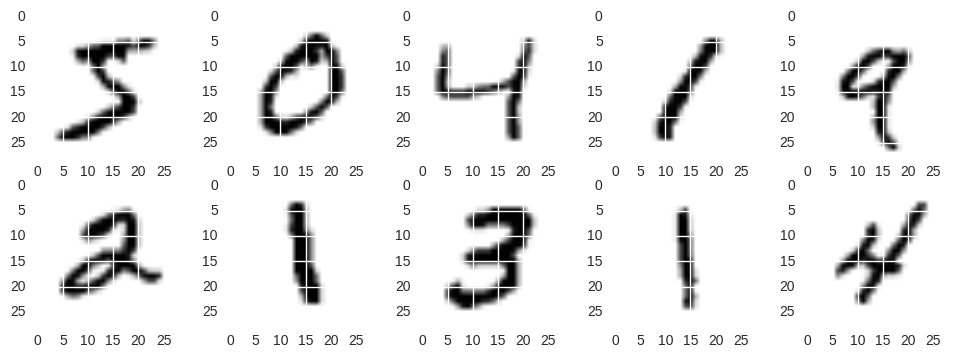

In [3]:
import math

nplots = 10
ncols = 5
nrows = math.ceil(nplots / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4))
for i, label in enumerate(y_train):
    if i >= nplots: 
        break
    im = X_train[i, 0, :, :]
    ix = i % ncols
    iy = math.floor(i / ncols)
    axes[iy][ix].imshow(im, cmap="gray_r")

fig.savefig('digits_10.png')

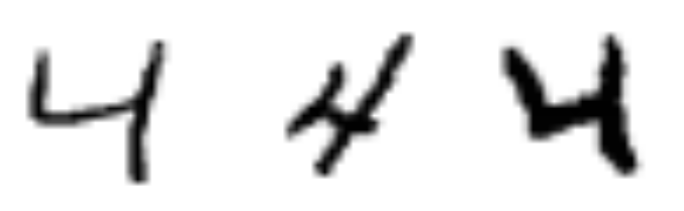

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
found_fours = 0
for i, label in enumerate(y_train):
    if label == 4:
        im = X_train[i, 0, :, :]
        ax = axes[found_fours]
        ax.imshow(im, cmap="gray_r")
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        found_fours +=1
    if found_fours >= 3:
        break
        
fig.savefig('some_training_fours.png')

### How generalizable is the model?

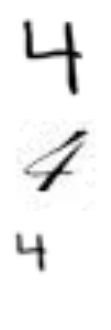

In [35]:
img_names=["my_four.tif",
          "my_four_fancy.tif",
          "my_four_small.tif"
          ]
fig, axes = plt.subplots(3, 1, figsize=(12, 4))
for f, ax in zip(img_names, axes):
    im = mpimg.imread(f)
    ax.imshow(im, cmap="gray_r")
    ax.xaxis.set_visible(False)    
    ax.yaxis.set_visible(False)
    ax.bbox
    
# fig.savefig('some_test_fours.png')

### Make predictions using the trained model

In [4]:
from predict import make_predictions
q = make_predictions()

Using gpu device 1: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5005)


Prediction: 4: 4 (1.000000), 9 (0.000000), 7 (0.000000), 1 (0.000000), 5 (0.000000), 8 (0.000000), 2 (0.000000), 0 (0.000000), 6 (0.000000), 3 (0.000000), 
Prediction: 2: 2 (0.707865), 8 (0.175933), 7 (0.053020), 1 (0.030159), 4 (0.017013), 3 (0.010016), 9 (0.002968), 5 (0.001565), 6 (0.000880), 0 (0.000582), 
Prediction: 7: 7 (0.394680), 1 (0.229425), 2 (0.174708), 5 (0.072690), 3 (0.052864), 0 (0.027655), 4 (0.019611), 6 (0.014676), 8 (0.010455), 9 (0.003236), 


### Confidence in predictions

NameError: name 'q' is not defined

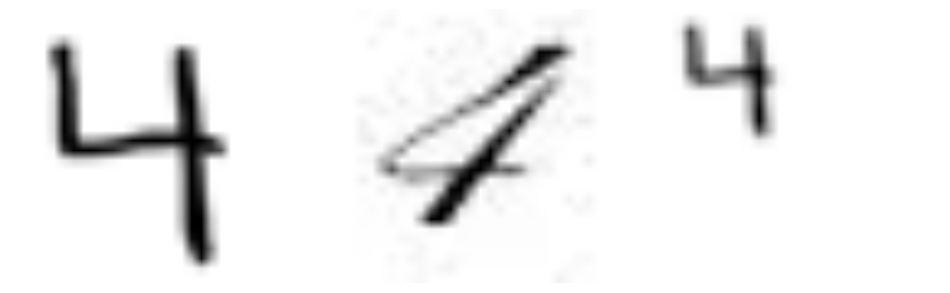

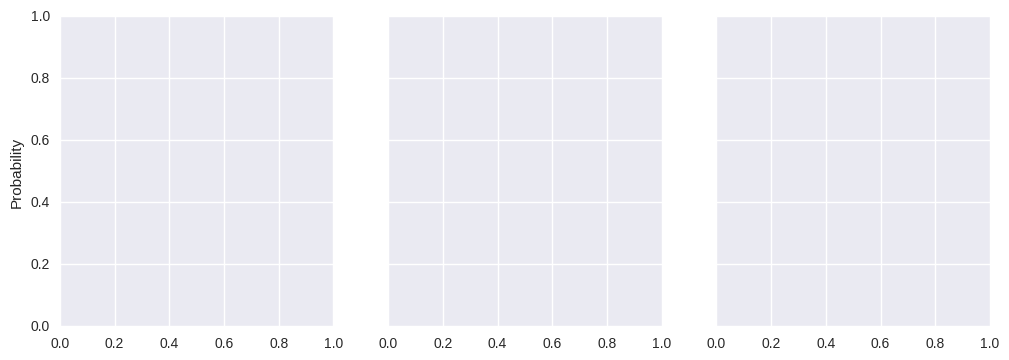

In [5]:
img_names=["my_four.tif",
          "my_four_fancy.tif",
          "my_four_small.tif"
          ]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for f, ax in zip(img_names, axes):
    im = mpimg.imread(f)
    ax.imshow(im, cmap="gray_r")
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
fig.savefig('test_fours.png')   

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
axes[0].set_ylabel('Probability')
for row, ax in zip(q, axes):
    ax.stem(row)
    ax.set_xlabel('Class')
fig.savefig('test_fours_probs.png')

In [5]:
output_notebook()

Loading BokehJS ...

In [9]:
from bokeh.charts import Bar, show
import pandas as pd

In [30]:
df = pd.DataFrame(q, index=['big_four', 'fancy_four', 'small_four'])
df

,0,1,2,3,4,5,6,7,8,9
big_four,1.708411e-17,3.918437e-10,1.379784e-13,9.617338e-18,1.000000,2.954556e-13,1.123751e-17,9.961157e-10,2.686377e-13,3.354470e-09
fancy_four,5.815488e-04,3.015886e-02,7.078655e-01,1.001558e-02,0.017013,1.564519e-03,8.799667e-04,5.301952e-02,1.759328e-01,2.968394e-03
small_four,2.765543e-02,2.294253e-01,1.747082e-01,5.286371e-02,0.019611,7.268961e-02,1.467553e-02,3.946796e-01,1.045543e-02,3.235960e-03


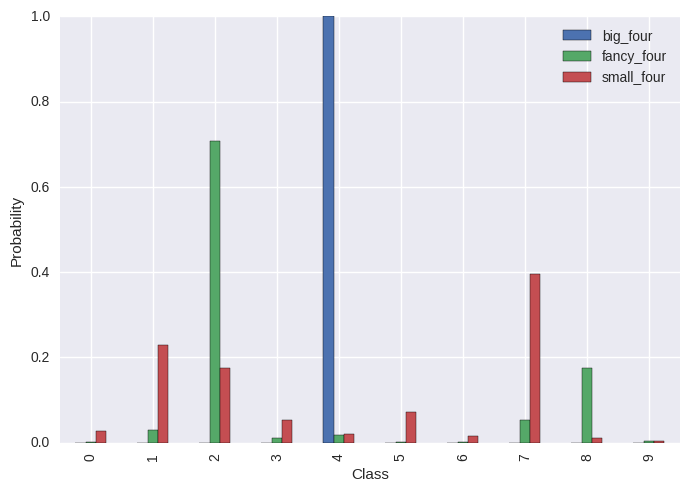

In [33]:
df.T.plot(kind='bar')
plt.xlabel('Class')
_ = plt.ylabel('Probability')